<a href="https://colab.research.google.com/github/vikpy/AISem3/blob/master/Test/M2_Test_AI_ANN_AND_CSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mid Term 2 Artificial Intelligence  

MTech Data Science 2019-21

Roll No. D005

SAP ID: 70271019005

Name: Vikraant Pai 

#**Q1 ) Using the dataset provided at https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip and the following description, solve the problem using a neural network approach , with cross validation,regularization and batch normalization.**


**Marking Scheme :**

1.) Solution through a neural network with justifying the use of relevant activations and loss functions - 85% Test Accuracy (3 marks)

2.) Use of Regularization - (1 Marks)

3.) Explanation of Calculation at Neuron for  any 2 layers (1 Marks)

4.) Backpropagation at 4th epoch - (1 Marks) 

Comments should follow pep8 style as asked earlier-> eg function to be followed with description of the function and its explanation. Data fetch from URl, Unzip etc read etc , all functionalities should happen in code itself. 




**ANSWER:**


In [1]:
# Fetching the data from the url 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip -P data

--2020-10-03 09:25:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘data/Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.03MB/s    in 0.3s    

2020-10-03 09:25:57 (1.03 MB/s) - ‘data/Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [2]:
# Unzipping the data from the zip file to target folder
import zipfile
with zipfile.ZipFile('/content/data/Bike-Sharing-Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

In [3]:
!pip install pyforest 
from pyforest import * 

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=b4025364b3f9382735d12ebee1f637ff77b711b4bc56c5e4234537a5f2a96561
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [4]:
day = pd.read_csv("/content/data/day.csv")
hour = pd.read_csv("/content/data/hour.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Let us work with the daily granularity. Firstly we drop the unnecessary variables in the data. 

In [8]:
day.drop("instant", axis = 1, inplace=True)
day.drop("dteday", axis = 1, inplace=True)
day["registered_ratio"] = day["registered"] / day["cnt"]  # Calculating the percentage of registered users, which will serve as another predicter

We find how the data is looking like checking the different params

In [12]:
day.dtypes

season                int64
yr                    int64
mnth                  int64
holiday               int64
weekday               int64
workingday            int64
weathersit            int64
temp                float64
atemp               float64
hum                 float64
windspeed           float64
casual                int64
registered            int64
cnt                   int64
registered_ratio    float64
dtype: object

In [13]:
day.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_ratio
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,0.824402
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.107375
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.489676
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,0.785196
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,0.851216
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,0.900679
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,0.986823


In [14]:
day.isnull().sum()

season              0
yr                  0
mnth                0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                 0
windspeed           0
casual              0
registered          0
cnt                 0
registered_ratio    0
dtype: int64

In [16]:
day.duplicated().sum()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

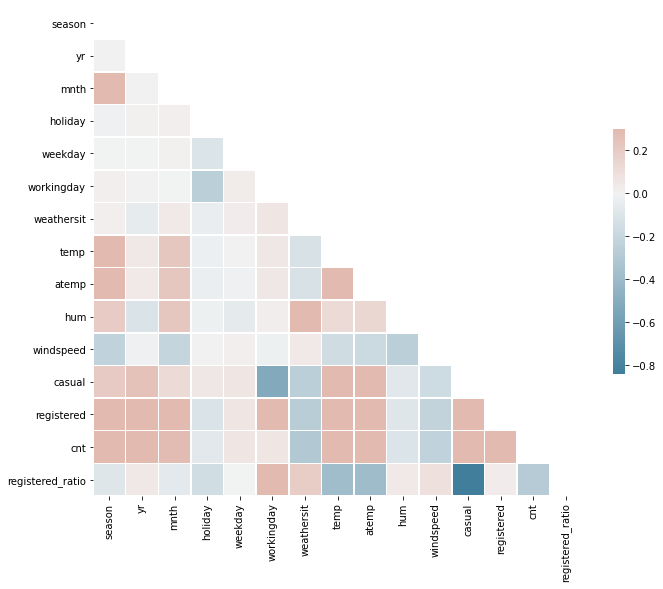

In [19]:
corr = day.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Now we know that the data does not have any missing value, and duplicates and also we know the datatypes of the data. 

Also we have seen, how the variables are correlated to each other so that we can make more sense of the data. 

Let us divide the data into X(features) and y(target) variables and Standardize the features to bring them in comparable ranges 

We standardize the feature variables so that weights while training in the neural network do no blow out of proportion.

In [122]:
X = day.drop(["casual", "registered", "cnt", "registered_ratio"], axis=1)
y = day["cnt"]

In [123]:
# Standardizing the data 
from sklearn.preprocessing import StandardScaler
X_scaled = pd.DataFrame( StandardScaler().fit_transform(X), columns=X.columns.values)
X_scaled.mean()

<IPython.core.display.Javascript object>

season       -1.976227e-15
yr           -3.165123e-16
mnth         -8.687381e-17
holiday      -6.705383e-17
weekday       1.002390e-17
workingday   -1.269694e-16
weathersit   -1.521810e-16
temp         -3.125635e-16
atemp        -1.063141e-17
hum          -9.973782e-16
windspeed    -1.827843e-16
dtype: float64

In [124]:
# We will split the data into train and test for training and evaluation 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

<IPython.core.display.Javascript object>

Now we have our X and y ready. Let us create neural network model using keras that can be used for solving the current problem using neural network 

**Since it is a Regression Problem, we will use linear activation for getting the output**. We will use ReLU activation for case in hand. 

In [302]:
import keras
from keras.models import Sequential
from keras.layers import ReLU, Input, Activation, Dense, Dropout, BatchNormalization

# Instantiating the model 
model = Sequential()
# Adding Input layer
model.add( Dense(X_train.shape[1],input_dim=X_train.shape[1], activation='relu', kernel_initializer='normal', bias_initializer='normal'))
# Adding one hidden layer 
model.add( Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l1(1e-5), bias_regularizer=keras.regularizers.l2(1e-4), kernel_initializer='normal', bias_initializer='normal'))
# Using Dropout Regularization
model.add(Dropout(0.20))
# Using Batch Normalization 
model.add(BatchNormalization())
# Adding the output layer
model.add( Dense(1, activation='relu' , kernel_initializer='normal', bias_initializer='normal'))

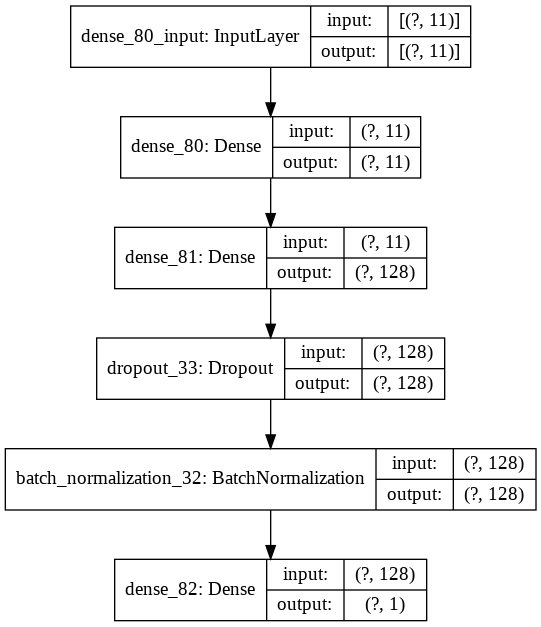

In [290]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In the above model we have used Dropout which is essentially to remove the unnecessary input neurons randomly

We have used L1 and L2 regularization on both our Output later and hidden layer. 

Also we have used BatchNormalization to normal the weights and biases while giving the input to the next layer.

These techniques essentially help us in avoiding overfitting and enhances our model for out of the sampel values. 

One of the primary benefits of using neural network model is that it also helps us removing the unnecessary input parameters which are not affecting the output using regularization. 

In [291]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_81 (Dense)             (None, 128)               1536      
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)               512       
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 129       
Total params: 2,309
Trainable params: 2,053
Non-trainable params: 256
_________________________________________________________________


##**Explanation of calculation of neurons for the model:**
Our Neural Network Model has 1 input layers, 1 Hidden Layer and 1 Output Layer


---
---


**Layer 1:(Input)**

Input Layer: X[rows,11]

Weights  W1[11,11]

Bias: B1[rows, 11]

Output layer 1 Z1 = ReLU( X.transpose(W1) +  B1)

Dimension of Z1 [rows, 11]

Params: 11*11 + 11 = 132

---
---


**Layer 2:(Hidden)** 

Input Layer: Z1[rows,11]

Weights  W2[128,11]

Bias: B2[rows, 128]

Output layer 1 Z1 = ReLU( Z1.transpose(W2) +  B2)

Dimension of Z2 [rows, 128]

Params: 128*11 + 128 = 1536

---
---


**Layer 3:(Output)** 

Input Layer: Z2[rows,128]

Weights  W3[1,128]

Bias: B2[rows, 1]

Output layer 1 Z3 = ReLU( Z2.transpose(W3) +  B3)

Dimension of Z3 [rows, 1]

Params: 128*1 + 1 = 129

---
---


In [303]:
# Compiling the model 
weights = []
model.compile(loss=keras.losses.MeanAbsolutePercentageError(), optimizer='sgd')
# Using call back to display weights at each epoch 
print_weights = keras.callbacks.LambdaCallback(on_epoch_end=lambda batch, logs: weights.append(model.layers[0].get_weights()))


In [304]:
history = model.fit(X_train,y_train, batch_size=32, epochs=10000, validation_split=0.2, verbose=0, callbacks=[print_weights])

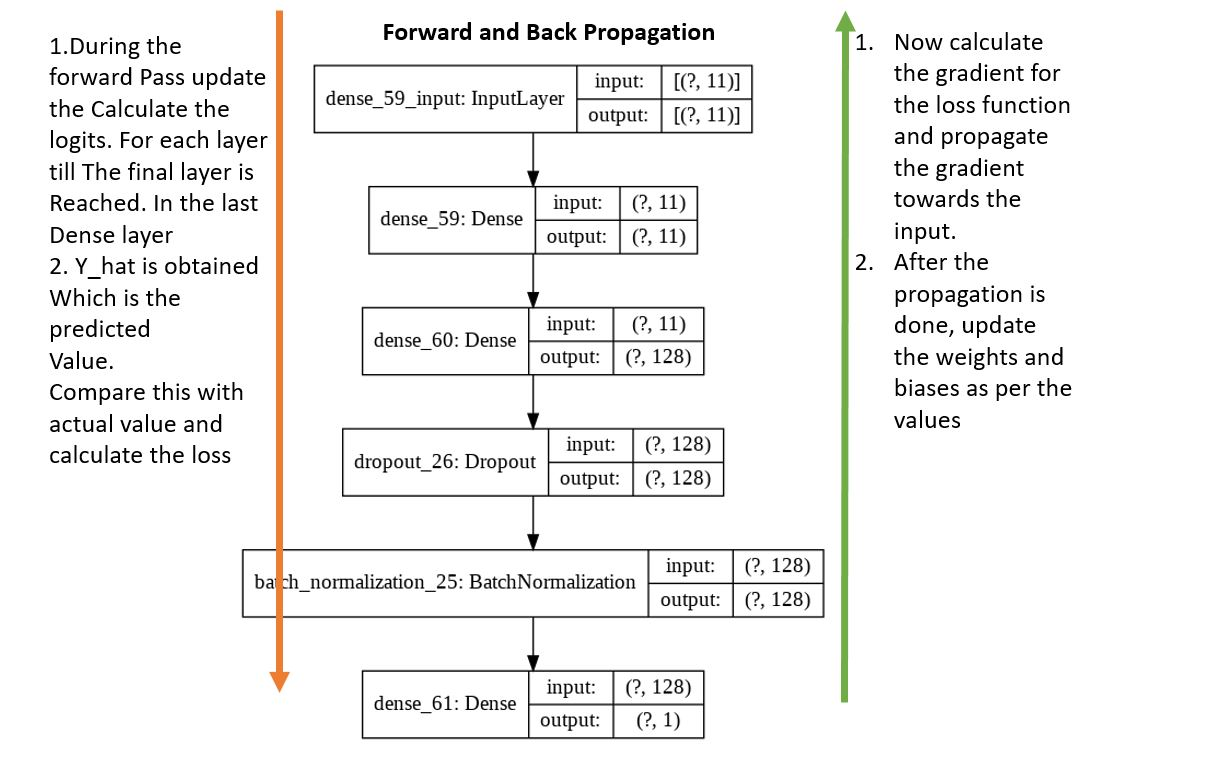

In [305]:
print(f"print weights after 4th iteration\n\n{weights[3]}")

print weights after 4th iteration

[array([[-0.04020721, -0.03221003,  0.04627066, -0.02122014,  0.02705633,
         0.03034865, -0.0494307 , -0.05162643,  0.08587393, -0.05889728,
        -0.00589329],
       [ 0.04915872,  0.00785953, -0.07459689, -0.00764832, -0.00256658,
         0.10121685,  0.00333486,  0.04621237,  0.10291222,  0.0116792 ,
         0.05005705],
       [ 0.00515836,  0.07236456, -0.04266762, -0.01760609,  0.03764575,
         0.03379057, -0.00386883,  0.01586694,  0.04629015,  0.05359932,
        -0.02606007],
       [ 0.00293996,  0.09455081, -0.01407531,  0.11866686, -0.00239845,
        -0.03361468,  0.03034247,  0.04231869, -0.07747169,  0.03066932,
        -0.07152855],
       [-0.06722021,  0.03071672,  0.01512501,  0.09406447, -0.07405876,
        -0.03328401, -0.01672728, -0.02495837,  0.00732283, -0.05293506,
        -0.04295541],
       [ 0.00472639, -0.00274066,  0.04018819,  0.01543236, -0.03788956,
        -0.0168578 ,  0.02330512,  0.05029833, -0.0

In [306]:
print(f"Mean Absolute Percentage Error for the Model is {model.evaluate(X_test, y_test)}")

5/5 [==============================] - 0s 1ms/step - loss: 14.2677
Mean Absolute Percentage Error for the Model is 14.267730712890625


In [307]:
from sklearn.metrics import r2_score

print(f"Calculated Test R2 Score for the for the model is {r2_score(model.predict(X_test).astype(int),y_test.values )}")


Calculated Test R2 Score for the for the model is 0.8603469971397047


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

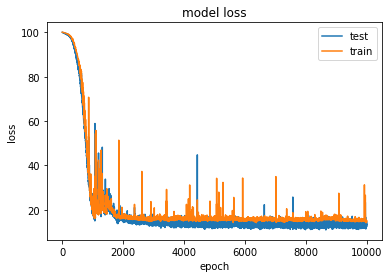

In [308]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='best')
plt.show()

just for refence 


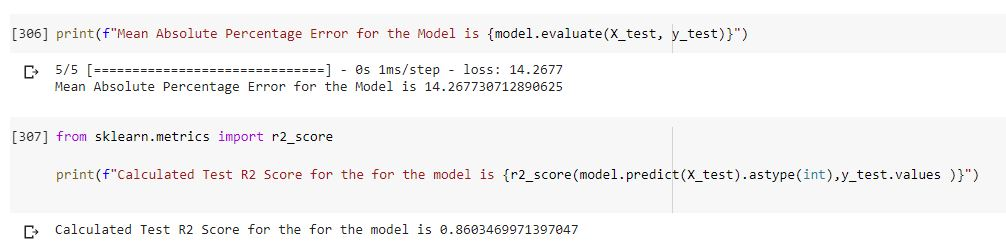

#**Q2 )The objective of the problem is just to ﬁll a 9 x 9 grid with numerical digits so that each column, each row, and each of the nine 3 x 3 sub-grids (also called boxes) contains one of all of the digits 1 through 9.**

**ANSWER:**


We Will Solve this as a constraint satisfcation problem

In [493]:
!pip install pulp
from pulp import *

In [589]:
class Solver:
  def __init__(self, size_of_grid, size_of_box):
    """
    Initializer funciton 
    grid size , box size 
    return None
    """
    self.rows = self.cols = self.values = range(1, size_of_grid + 1)
    self.boxes = size_of_box

  def solve_grid(self):
    """
    Uses internal vars for contructing the grid 
    """
    Boxes = [
    [(self.boxes*i+k+1, self.boxes*j+l+1) for k in range(self.boxes) for l in range(self.boxes)]
    for i in range(self.boxes) for j in range(self.boxes)
    ]
    prob = LpProblem("solve")
    options = LpVariable.dicts("options", (self.values, self.rows, self.cols), cat='Binary')
    for r in self.rows:
      for c in self.cols:
        prob += lpSum([options[v][r][c] for v in self.values]) == 1
    
    for v in self.values:
      for r in self.rows:
        prob += lpSum([options[v][r][c] for c in self.cols]) == 1
        
      for c in self.cols:
        prob += lpSum([options[v][r][c] for r in self.rows]) == 1

      for b in Boxes:
        prob += lpSum([options[v][r][c] for (r, c) in b]) == 1


    prob.solve()
    print("Status:", LpStatus[prob.status])

    # The solution is written to the sudokuout.txt file 
    for row in self.rows:
      if row in [1, 1 + self.boxes, 1 + 2*self.boxes]:
        print("|X|*******|X|*******|X|*******|X|\n")
      for col in self.cols:
        for val in self.values:
          if value(options[val][row][col]) == 1:
            if col in [1, 1 + self.boxes, 1 + 2*self.boxes]:
              print(" || ", end="")
            print(str(val) + " ", end="")
            if col == 9:
              print(" ||\n")
    print("|X|*******|X|*******|X|*******|X|")
    return None                    


In [590]:
prob1 = Solver(9, 3)
prob1.solve_grid()

Status: Optimal
|X|*******|X|*******|X|*******|X|

 || 3 6 5  || 9 7 4  || 2 1 8  ||

 || 1 9 4  || 2 3 8  || 6 5 7  ||

 || 2 7 8  || 5 6 1  || 4 9 3  ||

|X|*******|X|*******|X|*******|X|

 || 5 2 3  || 4 9 7  || 1 8 6  ||

 || 8 4 9  || 6 1 2  || 7 3 5  ||

 || 7 1 6  || 3 8 5  || 9 2 4  ||

|X|*******|X|*******|X|*******|X|

 || 9 3 1  || 8 4 6  || 5 7 2  ||

 || 6 5 7  || 1 2 3  || 8 4 9  ||

 || 4 8 2  || 7 5 9  || 3 6 1  ||

|X|*******|X|*******|X|*******|X|
